In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from plotly.offline import iplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [8]:
#check dataset if has null value
df.isnull().values.any()

False

In [9]:
#count the null values in dataset (if has)
df.isnull().sum().sum()

0

In [10]:
# Kiểm tra số lượng hàng và cột trong DataFrame
num_rows, num_columns = df.shape
print(f"Số lượng đặc trưng là: {num_columns}")

Số lượng đặc trưng là: 17


In [11]:
# Xem danh sách các đặc trưng
feature_list = df.columns.tolist()
print(f"Danh sách các đặc trưng: {feature_list}")

Danh sách các đặc trưng: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


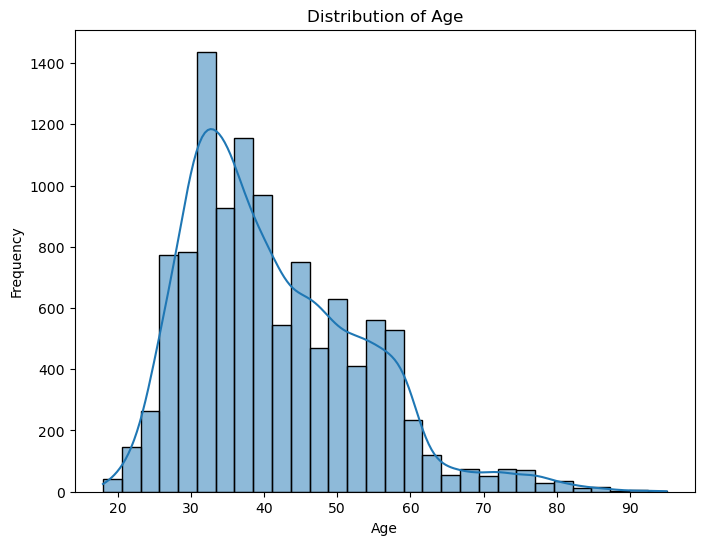

In [12]:
#Vẽ biểu đồ histogram của biến tuổi (age):
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

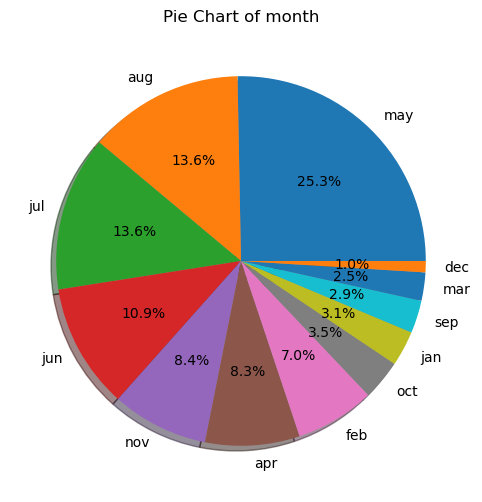

In [13]:
def PiePlot(column,shadow=None):
    plt.figure(figsize=(12,6))
    plt.pie(df[column].value_counts(), labels = df[column].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.title(f'Pie Chart of {column}')
    plt.show()

PiePlot('month')

In [14]:
fig = px.histogram(df["age"],
                   nbins=20,
                   color_discrete_sequence=["#4285F4"],
                   labels = {"value" :"Ages", "count" : "Frequency"},
                   title="The Distribution of Ages",text_auto=True)

fig.update_layout(showlegend = False ,title = {"font": {"size": 26,"family": "tahoma",}})
fig.update_traces(textfont= {"family": "consolas","size": 14}, hovertemplate = "Age Range: %{x}<br>Frequency: %{y}",marker = {"line": {"color": "#000", "width":1}} )

iplot(fig)

In [15]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [16]:
age_job=pd.pivot_table(df, values='age', index='job', aggfunc='mean')
print(age_job)

                     age
job                     
admin.         39.374063
blue-collar    39.505144
entrepreneur   42.887195
housemaid      47.445255
management     40.218239
retired        65.424165
self-employed  39.809877
services       38.141928
student        26.102778
technician     39.001646
unemployed     40.997199
unknown        46.857143


<Figure size 1000x500 with 0 Axes>

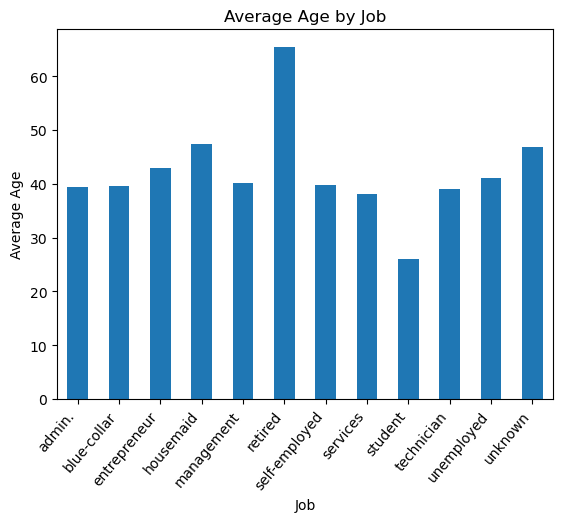

In [17]:
plt.figure(figsize=(10,5))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()

In [18]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [19]:
df=df[df['education']!='unknown']

In [20]:
def countplot(data, hue=None, column=None, order=None, order_hue=None, saturation=1.0, label_dict=None):
    plt.figure(figsize=(10, 5))

    if column:
        plt.title(f'Countplot graph for {column} ')
        ax = sns.countplot(x=column, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)

        if order is not None and label_dict is not None:
            plt.xticks(ticks=range(len(order)), labels=[f' {i}: {label_dict[val]}' for i, val in enumerate(order)])

        # Annotate each bar with its count
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    else:
        raise ValueError("Specify either column_x or column_y")

    plt.show()

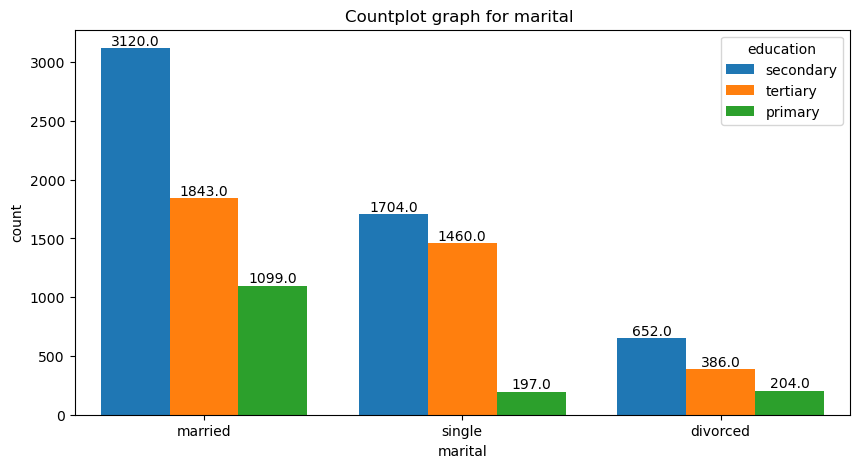

In [21]:
countplot(df, hue='education', column='marital')

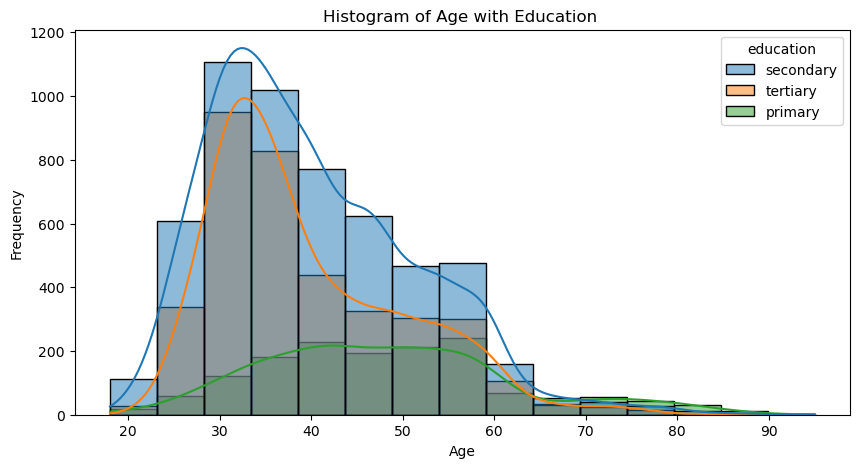

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=df.age, hue=df.education, bins=15, kde=True)

plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

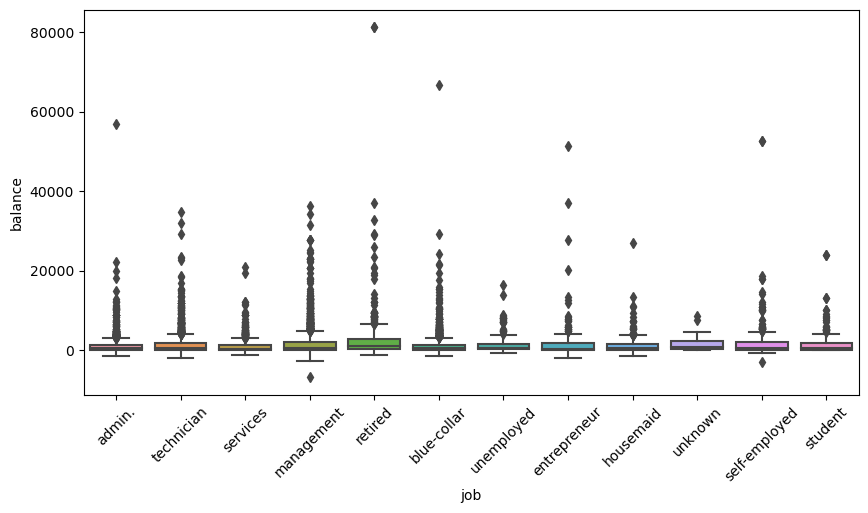

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df,x = df.job, y= df.balance)
plt.xticks(rotation = 45)
plt.show()

In [24]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [25]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [28]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("---------------------------------------")

c:\Users\hitru\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
Accuracy: 0.7703
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1122
           1       0.77      0.74      0.75      1011

    accuracy                           0.77      2133
   macro avg       0.77      0.77      0.77      2133
weighted avg       0.77      0.77      0.77      2133

Confusion Matrix:
[[898 224]
 [266 745]]
---------------------------------------
Model: Random Forest
Accuracy: 0.8453
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1122
           1       0.81      0.88      0.84      1011

    accuracy                           0.85      2133
   macro avg       0.85      0.85      0.85      2133
weighted avg       0.85      0.85      0.85      2133

Confusion Matrix:
[[912 210]
 [120 891]]
---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8425
Classification

Model: Gradient Boosting (Overfit)
Accuracy: 0.7520
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1135
           1       0.79      0.63      0.71       998

    accuracy                           0.75      2133
   macro avg       0.76      0.74      0.75      2133
weighted avg       0.76      0.75      0.75      2133

Confusion Matrix:
[[971 164]
 [365 633]]
---------------------------------------
Model: AdaBoost (Overfit)
Accuracy: 0.7337
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1135
           1       0.77      0.62      0.68       998

    accuracy                           0.73      2133
   macro avg       0.74      0.73      0.73      2133
weighted avg       0.74      0.73      0.73      2133

Confusion Matrix:
[[949 186]
 [382 616]]
---------------------------------------
Model: Random Forest (Overfit)
Accuracy: 0.

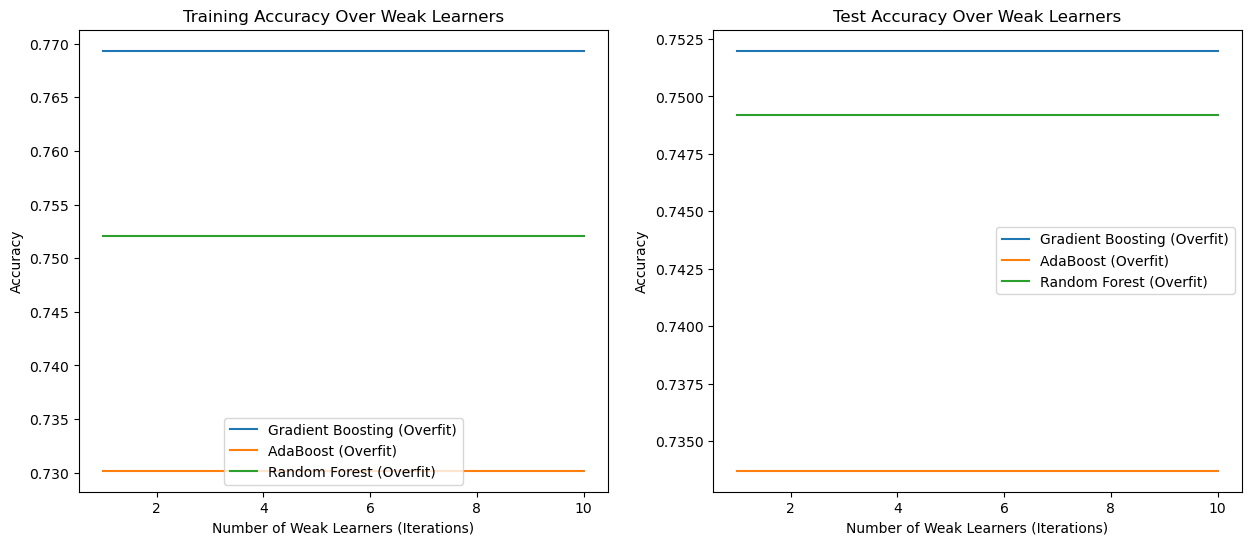

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification


# Split the dataset
X = df.drop('housing', axis=1)
y = df['housing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intentionally use a small number of samples and weak learners to encourage overfitting
n_estimators = 10

# Gradient Boosting with intentional overfitting
gradient_boosting_overfit = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=5, random_state=42)
gradient_boosting_overfit.fit(X_train, y_train)

# AdaBoost with intentional overfitting
adaboost_overfit = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1.0, random_state=42)
adaboost_overfit.fit(X_train, y_train)

# Random Forest with intentional overfitting
random_forest_overfit = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=42)
random_forest_overfit.fit(X_train, y_train)

# Evaluate models
models = {
    'Gradient Boosting (Overfit)': gradient_boosting_overfit,
    'AdaBoost (Overfit)': adaboost_overfit,
    'Random Forest (Overfit)': random_forest_overfit
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("---------------------------------------")

train_accuracies = {'Gradient Boosting (Overfit)': [], 'AdaBoost (Overfit)': [], 'Random Forest (Overfit)': []}
test_accuracies = {'Gradient Boosting (Overfit)': [], 'AdaBoost (Overfit)': [], 'Random Forest (Overfit)': []}

# Train models with varying number of weak learners
for i in range(1, n_estimators + 1):
    # Gradient Boosting with intentional overfitting
    gradient_boosting_overfit = GradientBoostingClassifier(n_estimators=i, max_depth=5, random_state=42)
    gradient_boosting_overfit.fit(X_train, y_train)
    
    # AdaBoost with intentional overfitting
    adaboost_overfit = AdaBoostClassifier(n_estimators=i, learning_rate=1.0, random_state=42)
    adaboost_overfit.fit(X_train, y_train)

    # Random Forest with intentional overfitting
    random_forest_overfit = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=42)
    random_forest_overfit.fit(X_train, y_train)

    # Evaluate models
    for model_name, model in models.items():
        train_accuracies[model_name].append(accuracy_score(y_train, model.predict(X_train)))
        test_accuracies[model_name].append(accuracy_score(y_test, model.predict(X_test)))

# Plotting
plt.figure(figsize=(15, 6))

# Plot training accuracies
plt.subplot(1, 2, 1)
for model_name, acc in train_accuracies.items():
    plt.plot(range(1, n_estimators + 1), acc, label=model_name)

plt.title('Training Accuracy Over Weak Learners')
plt.xlabel('Number of Weak Learners (Iterations)')
plt.ylabel('Accuracy')
plt.legend()

# Plot test accuracies
plt.subplot(1, 2, 2)
for model_name, acc in test_accuracies.items():
    plt.plot(range(1, n_estimators + 1), acc, label=model_name)

plt.title('Test Accuracy Over Weak Learners')
plt.xlabel('Number of Weak Learners (Iterations)')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [31]:
# df.columns
X = df.drop('balance', axis=1)
y = df['balance']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_ffnn = model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Feed Forward Neural Network - Test Accuracy: {accuracy:.4f}')



Epoch 1/10


267/267 [==============================] - 4s 6ms/step - loss: -81832.5000 - accuracy: 0.0040 - val_loss: -312770.4062 - val_accuracy: 0.0042
Epoch 2/10
267/267 [==============================] - 1s 5ms/step - loss: -1316607.5000 - accuracy: 0.0034 - val_loss: -2839029.0000 - val_accuracy: 0.0042
Epoch 3/10
267/267 [==============================] - 2s 6ms/step - loss: -6127875.0000 - accuracy: 0.0034 - val_loss: -9991699.0000 - val_accuracy: 0.0042
Epoch 4/10
267/267 [==============================] - 2s 6ms/step - loss: -16933810.0000 - accuracy: 0.0034 - val_loss: -23839890.0000 - val_accuracy: 0.0042
Epoch 5/10
267/267 [==============================] - 2s 6ms/step - loss: -34515304.0000 - accuracy: 0.0034 - val_loss: -44599260.0000 - val_accuracy: 0.0042
Epoch 6/10
267/267 [==============================] - 2s 6ms/step - loss: -60102976.0000 - accuracy: 0.0034 - val_loss: -73906528.0000 - val_accuracy: 0.0042
Epoch 7/10
267/267 [==============================] - 1s 

Epoch 1/50
267/267 [==============================] - 3s 4ms/step - loss: -20955.6133 - accuracy: 0.0077 - val_loss: -83091.6797 - val_accuracy: 0.0042 - lr: 0.0010
Epoch 2/50
267/267 [==============================] - 1s 5ms/step - loss: -432745.3125 - accuracy: 0.0034 - val_loss: -969738.2500 - val_accuracy: 0.0042 - lr: 0.0010
Epoch 3/50
267/267 [==============================] - 2s 6ms/step - loss: -2108694.2500 - accuracy: 0.0034 - val_loss: -3450275.7500 - val_accuracy: 0.0042 - lr: 0.0010
Epoch 4/50
267/267 [==============================] - 1s 5ms/step - loss: -5941603.5000 - accuracy: 0.0034 - val_loss: -8413305.0000 - val_accuracy: 0.0042 - lr: 0.0010
Epoch 5/50
267/267 [==============================] - 1s 4ms/step - loss: -12808968.0000 - accuracy: 0.0034 - val_loss: -16428257.0000 - val_accuracy: 0.0042 - lr: 0.0010
Epoch 6/50
267/267 [==============================] - 1s 4ms/step - loss: -22246048.0000 - accuracy: 0.0034 - val_loss: -27608590.0000 - val_accuracy: 0.0042 -

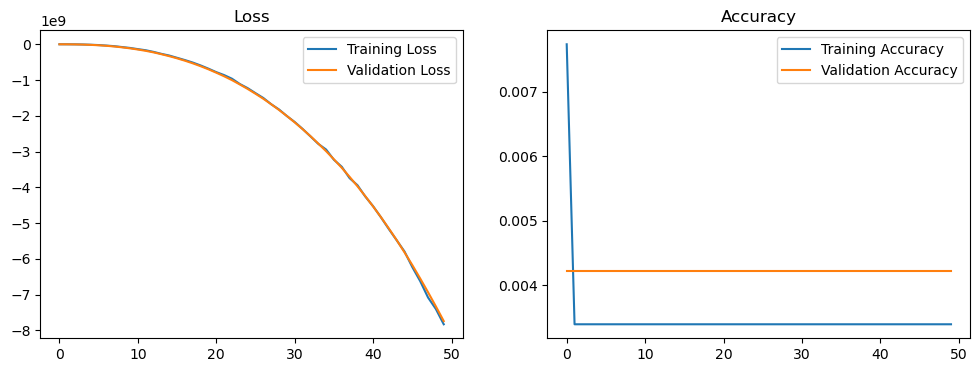

In [34]:
#Overfitting for FFNN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Model definition with increased dropout rate and L2 regularization
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increase dropout rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increase dropout rate
    Dense(1, activation='sigmoid')
])

# Model compilation
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Model training with early stopping and reduce learning rate on plateau
history_ffnn = model_ffnn.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Feed Forward Neural Network - Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


In [35]:
from tensorflow.keras.layers import LSTM

In [36]:
X_rnn = df['month'].values.reshape(-1, 1)
y_rnn = df['month']

In [37]:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

scaler_rnn = StandardScaler()
X_train_rnn = scaler_rnn.fit_transform(X_train_rnn)
X_test_rnn = scaler_rnn.transform(X_test_rnn)

In [38]:
X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_test_rnn = X_test_rnn.reshape((X_test_rnn.shape[0], X_test_rnn.shape[1], 1))

model_rnn = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print(f'Recurrent Neural Network - Test Accuracy: {accuracy_rnn:.4f}')

Epoch 1/10
267/267 [==============================] - 7s 11ms/step - loss: -10.5949 - accuracy: 0.0811 - val_loss: -33.7408 - val_accuracy: 0.0858
Epoch 2/10
267/267 [==============================] - 2s 6ms/step - loss: -77.8367 - accuracy: 0.0811 - val_loss: -123.9106 - val_accuracy: 0.0858
Epoch 3/10
267/267 [==============================] - 2s 7ms/step - loss: -173.5693 - accuracy: 0.0811 - val_loss: -218.5556 - val_accuracy: 0.0858
Epoch 4/10
267/267 [==============================] - 2s 6ms/step - loss: -266.4884 - accuracy: 0.1362 - val_loss: -307.4018 - val_accuracy: 0.2189
Epoch 5/10
267/267 [==============================] - 2s 6ms/step - loss: -353.1593 - accuracy: 0.2191 - val_loss: -390.4044 - val_accuracy: 0.2189
Epoch 6/10
267/267 [==============================] - 1s 5ms/step - loss: -434.4257 - accuracy: 0.1808 - val_loss: -468.9664 - val_accuracy: 0.1331
Epoch 7/10
267/267 [==============================] - 2s 6ms/step - loss: -511.6942 - accuracy: 0.1380 - val_loss:

Epoch 1/50
267/267 [==============================] - 9s 8ms/step - loss: -9.4738 - accuracy: 0.1095 - val_loss: -31.9770 - val_accuracy: 0.0858 - lr: 0.0010
Epoch 2/50
267/267 [==============================] - 1s 6ms/step - loss: -66.0176 - accuracy: 0.1088 - val_loss: -118.6565 - val_accuracy: 0.2189 - lr: 0.0010
Epoch 3/50
267/267 [==============================] - 1s 5ms/step - loss: -152.8673 - accuracy: 0.1069 - val_loss: -214.3316 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 4/50
267/267 [==============================] - 2s 6ms/step - loss: -243.8756 - accuracy: 0.1231 - val_loss: -305.0175 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 5/50
267/267 [==============================] - 1s 5ms/step - loss: -333.5805 - accuracy: 0.1674 - val_loss: -390.9006 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 6/50
267/267 [==============================] - 1s 5ms/step - loss: -418.0202 - accuracy: 0.1561 - val_loss: -471.5172 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 7/50
267/267 [==================

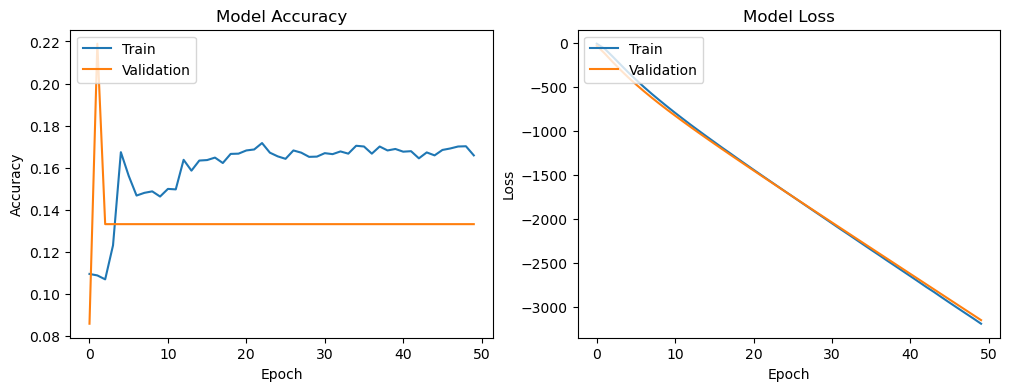

In [39]:
#overfitting for RNN
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data and scale it
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

scaler_rnn = StandardScaler()
X_train_rnn = scaler_rnn.fit_transform(X_train_rnn)
X_test_rnn = scaler_rnn.transform(X_test_rnn)

X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_test_rnn = X_test_rnn.reshape((X_test_rnn.shape[0], X_test_rnn.shape[1], 1))

# Model definition with increased dropout rate, recurrent dropout, early stopping, and reduce learning rate on plateau
model_rnn = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), dropout=0.5, recurrent_dropout=0.5),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping_rnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr_rnn = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Model training with early stopping and reduce learning rate on plateau
history_rnn = model_rnn.fit(
    X_train_rnn, y_train_rnn, epochs=50, batch_size=32,
    validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping_rnn, reduce_lr_rnn]
)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print(f'Recurrent Neural Network - Test Accuracy: {accuracy_rnn:.4f}')

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
X = df.drop('month', axis=1)
y = df['month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình ban đầu
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.5925925925925926
Confusion Matrix:
[[ 84  10   0   5   3  21   4   3  23  23   7   0]
 [ 13 173   0  11   2  27   6   0  37  13   1   1]
 [  1   3   1   0   0   3   3   0   4   0   1   2]
 [  4  39   0  65   1   6   8   5  15  11   6   2]
 [  3   8   0   1  29   9   0   1   3   3   3   0]
 [ 10  47   0   5   5 173  10   0  28  18   1   3]
 [  4   9   3  11   2   3 140   2  41   4   3   6]
 [  5   8   0   5   0   4   2   3   4   4   4   1]
 [  5  22   0  10   1  20  21   0 451  16   3   0]
 [  4  21   0   5   2  13   3   2   4 129   2   2]
 [  6   9   0   3   5   9   3   0   9   6  10   3]
 [  7   7   1   4   3   7   8   0   6   5   5   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.46      0.51       183
           1       0.49      0.61      0.54       284
           2       0.20      0.06      0.09        18
           3       0.52      0.40      0.45       162
           4       

In [43]:
# Phân tích các trường hợp sai
incorrect_predictions = X_test[y_test != y_pred]
correct_labels = y_test[y_test != y_pred]
predicted_labels = y_pred[y_test != y_pred]

# Thực hiện cải thiện mô hình (ví dụ: tinh chỉnh siêu tham số)
# Ví dụ: Tăng số lượng cây (n_estimators) và độ sâu cây (max_depth) của RandomForestClassifier
improved_model = RandomForestClassifier(n_estimators=100, max_depth=10)
improved_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra với mô hình cải thiện
y_pred_improved = improved_model.predict(X_test)

# Đánh giá mô hình cải thiện
print("\nImproved Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_improved)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_improved))
print("Classification Report:")
print(classification_report(y_test, y_pred_improved))


Improved Model Performance:
Accuracy: 0.5649320206282231
Confusion Matrix:
[[ 60  24   0   5   3  25   3   0  30  27   6   0]
 [ 12 180   0   5   1  24   4   0  47   8   2   1]
 [  1   5   0   0   1   1   2   0   3   0   3   2]
 [  4  47   0  56   0   4  12   0  22  10   6   1]
 [  2  14   0   1  24  11   0   0   2   4   2   0]
 [  1  61   0   4   4 154  11   0  43  18   3   1]
 [  5  19   0  11   2   0 132   0  50   3   3   3]
 [  9  13   0   3   0   2   3   0   4   2   3   1]
 [  7  27   0   7   1   8  15   0 463  16   4   1]
 [  2  37   0   2   1   9   4   0   5 121   4   2]
 [ 11  11   0   0   3   7   1   0   8   6  13   3]
 [  9  14   0   3   0   5   7   0  11   4   4   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.33      0.39       183
           1       0.40      0.63      0.49       284
           2       0.00      0.00      0.00        18
           3       0.58      0.35      0.43       162
           4     

c:\Users\hitru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hitru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hitru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

